# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [1]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

ModuleNotFoundError: No module named 'Utils'

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [3]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [4]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [5]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [6]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)])

In [10]:
F_X_12([1,0])

0.9551328068916008

This is the JDF for this problem

In [14]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0,2):
    print("y <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [ ]:
F_X_12((1,0))

In [15]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [16]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [ ]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [ ]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [ ]:
# Or we can just compute it directly
np.mean(Y_obs)

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [17]:
x = np.random.normal(size=100)

In [18]:
np.mean(x)

-0.08265975892373005

In [19]:
g = lambda x: x**2

In [23]:
mean = np.mean(x)
y = x-mean
np.mean(y**4)

3.588674726116084

## Moments etc

In [1]:
import numpy as np
x = np.random.normal(size=100)

In [2]:
x

array([ 8.33273507e-01,  2.07097640e+00, -9.44836239e-01,  7.88673132e-02,
       -6.17812086e-01, -6.34155265e-02, -4.69345923e-01,  1.36418134e+00,
        1.67699749e+00, -9.11865333e-01,  5.59747946e-01,  5.33849609e-01,
        1.65807666e+00, -6.28011913e-01, -6.54122161e-02,  1.05660433e+00,
        1.31316847e+00,  1.07607729e+00, -9.83020253e-01,  8.36646328e-01,
        9.67267242e-01, -2.82512670e-01, -2.43409794e-01, -1.21920368e+00,
       -1.93735577e+00, -4.42848063e-01,  2.96303400e-02,  1.03253210e+00,
        1.73435275e+00,  7.29941328e-01,  3.48161801e-01, -9.71118208e-01,
       -7.33683519e-01, -3.37556859e-01, -4.99894168e-01, -6.45005766e-01,
        1.96438015e+00, -3.04296243e-01, -8.27489786e-01,  1.34164218e+00,
        1.50951879e-01, -4.04284103e-01, -4.02679056e-01,  1.43020500e+00,
        4.43830226e-01, -5.86659851e-01, -1.27791389e+00,  2.10215711e-02,
        1.05397802e-01,  6.33704492e-01, -8.51476430e-01,  2.18143047e+00,
       -1.23119178e+00,  

## Sample mean

In [3]:
np.mean(x)

0.059403606435662

## Sample variance

In [4]:
np.var(x)

0.9443439763062373

Or by doing it yourself

In [5]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

0.9443439763062373

Higher moments, we can use `scipy`

In [6]:
from scipy.stats import skew, kurtosis

In [7]:
skew(x)

0.06231653748726836

In [8]:
kurtosis(x,fisher=False)

2.4807205053458907

## Moments and tail behavior

In [9]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

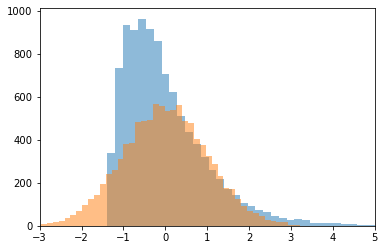

In [11]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [12]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [14]:
print_basic_stats(standardize(normal))

mean: 0.00	std: 1.00	skew: 0.02	kurtosis: 2.92


In [15]:
print_basic_stats(standardize(chi2))

mean: -0.00	std: 1.00	skew: 1.46	kurtosis: 6.23


In [16]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: -0.00	std: 1.00	skew: 0.42	kurtosis: 3.13


In [17]:
np.mean(np.power(standardize(chi2),3)) # Skewness

1.4643625541885408

In [18]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

6.227402035558242

## Transformations of random variables

Consider a Binomial random variable

In [19]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

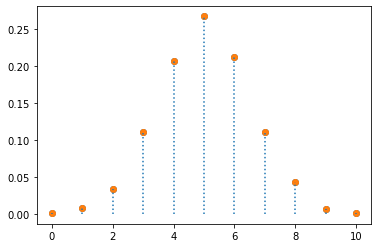

In [21]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

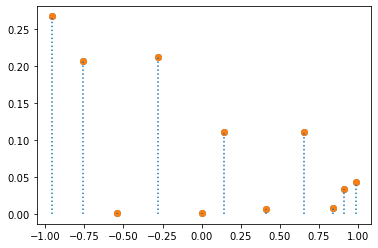

In [22]:
plotEMF(makeEMF(np.sin(x)))

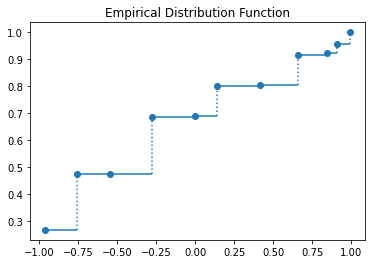

In [23]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [24]:
import math
result = math.asin(0.5)  # Returns π/6 or 0.5235987755982988


In [25]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

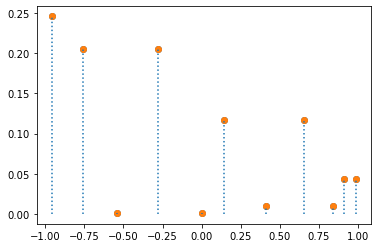

In [26]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

In [27]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))

NameError: name 'emfToEdf' is not defined